# Import Libraries

In [24]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings #avoid warning flash
warnings.filterwarnings('ignore')

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Read Dataset

In [25]:
df = pd.read_csv('/content/heart.csv')
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,30,F,TA,170,237,0,ST,170,N,0,Up,0
1,31,F,ATA,100,219,0,ST,150,N,0,Up,0
2,32,F,ATA,105,198,0,Normal,165,N,0,Up,0
3,33,F,ASY,100,246,0,Normal,150,Y,1,Flat,1
4,34,F,ATA,130,161,0,Normal,190,N,0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,75,M,ASY,136,225,0,Normal,112,Y,3,Flat,1
914,75,M,ASY,160,310,1,Normal,112,Y,2,Down,0
915,76,M,NAP,104,113,0,LVH,120,N,35,Down,1
916,77,M,ASY,124,171,0,ST,110,Y,2,Up,1


# Data Pre-Processing

Exploratory Data Analysis

a. Understanding the dataset
- Head of the dataset
- Shape of the data set
- Types of columns
- Information about data set
- Summary of the data set

In [26]:
df.head() #Menampilkan 5 data teratas dari dataset

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,30,F,TA,170,237,0,ST,170,N,0,Up,0
1,31,F,ATA,100,219,0,ST,150,N,0,Up,0
2,32,F,ATA,105,198,0,Normal,165,N,0,Up,0
3,33,F,ASY,100,246,0,Normal,150,Y,1,Flat,1
4,34,F,ATA,130,161,0,Normal,190,N,0,Up,0


In [27]:
df.shape

(918, 12)

In [28]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [29]:
df.dtypes

Age                int64
Sex               object
ChestPainType     object
RestingBP          int64
Cholesterol        int64
FastingBS          int64
RestingECG        object
MaxHR              int64
ExerciseAngina    object
Oldpeak            int64
ST_Slope          object
HeartDisease       int64
dtype: object

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64 
 8   ExerciseAngina  918 non-null    object
 9   Oldpeak         918 non-null    int64 
 10  ST_Slope        918 non-null    object
 11  HeartDisease    918 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 86.2+ KB


- Number of Entries: Dataset terdiri dari 918 entri, mulai dari indeks 0 hingga 918.
- Columns: Ada 12 kolom dalam dataset yang sesuai dengan berbagai atribut pasien dan hasil tes.
- Tipe Data: Sebagian besar kolom (7 dari 12) adalah tipe data int64.
- Missing Values: Tidak terlihat ada nilai yang hilang dalam dataset karena setiap kolom memiliki 918 entri non-null.

In [31]:
df.describe().T

#count: Jumlah baris yang tidak kosong dalam suatu fitur.
#mean: Nilai rata-rata dari fitur tersebut.
#std: Nilai Standar Deviasi dari fitur tersebut.
#min: Nilai minimum dari fitur tersebut.
#max: Nilai maksimum dari fitur tersebut.
#25%, 50%, dan 75% adalah persentil/kuartil dari setiap fitur.

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,5.393246,8.774345,-26.0,0.00,1.0,8.0,62.0
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


1. Usia (Age):

Rata-rata usia peserta adalah sekitar 53.5 tahun, dengan standar deviasi sekitar 9.43 tahun.
Usia peserta berkisar dari 28 hingga 77 tahun, dengan sebagian besar peserta berada di rentang 47 hingga 60 tahun.

2. Tekanan Darah Istirahat (RestingBP):

Rata-rata tekanan darah istirahat adalah sekitar 132.4 mmHg, dengan standar deviasi sekitar 18.51 mmHg.
Tekanan darah istirahat peserta berkisar dari 0 hingga 200 mmHg, dengan sebagian besar peserta memiliki tekanan darah istirahat antara 120 hingga 140 mmHg.

3. Kolesterol (Cholesterol):

Rata-rata kolesterol peserta adalah sekitar 198.8 mg/dL, dengan standar deviasi sekitar 109.38 mg/dL.
Kolesterol peserta berkisar dari 0 hingga 603 mg/dL, dengan sebagian besar peserta memiliki kolesterol antara 173.25 hingga 267 mg/dL.

4. Gula Darah Puasa (FastingBS):

Sekitar 23.31% dari peserta memiliki gula darah puasa yang tinggi (1), sedangkan sisanya 76.69% memiliki gula darah puasa normal (0).

5. Denyut Jantung Maksimal (MaxHR):

Rata-rata denyut jantung maksimal adalah sekitar 136.81 bpm, dengan standar deviasi sekitar 25.46 bpm.
Denyut jantung maksimal peserta berkisar dari 60 hingga 202 bpm, dengan sebagian besar peserta memiliki denyut jantung maksimal antara 120 hingga 156 bpm.

6. Depresi ST pada Latihan (Oldpeak):

Rata-rata depresi ST pada latihan adalah sekitar 0.89, dengan standar deviasi sekitar 1.07.
Depresi ST pada latihan peserta berkisar dari -2.6 hingga 6.2, dengan sebagian besar peserta memiliki depresi ST pada latihan antara 0 hingga 1.5.

7. Penyakit Jantung (HeartDisease):

Sekitar 55.34% dari peserta didiagnosis menderita penyakit jantung (1), sedangkan sisanya 44.66% tidak (0).

In [32]:
df.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

b. Data Cleaning

- Checking NULL values
- Dropping duplicate values

In [33]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [34]:
df.duplicated().sum()

0

# Data Visualization

In [35]:
pd.crosstab(df.HeartDisease, df.Sex)

Sex,F,M
HeartDisease,,
0,143,267
1,50,458


Eksplorasi Data

Data Kategorikal

Kolom data yang termasuk ke dalam data kategorikal antara lain:
1. Sex
2. ChestPainType
3. RestingECG
4. ExerciseAngina
5. ST_Slope

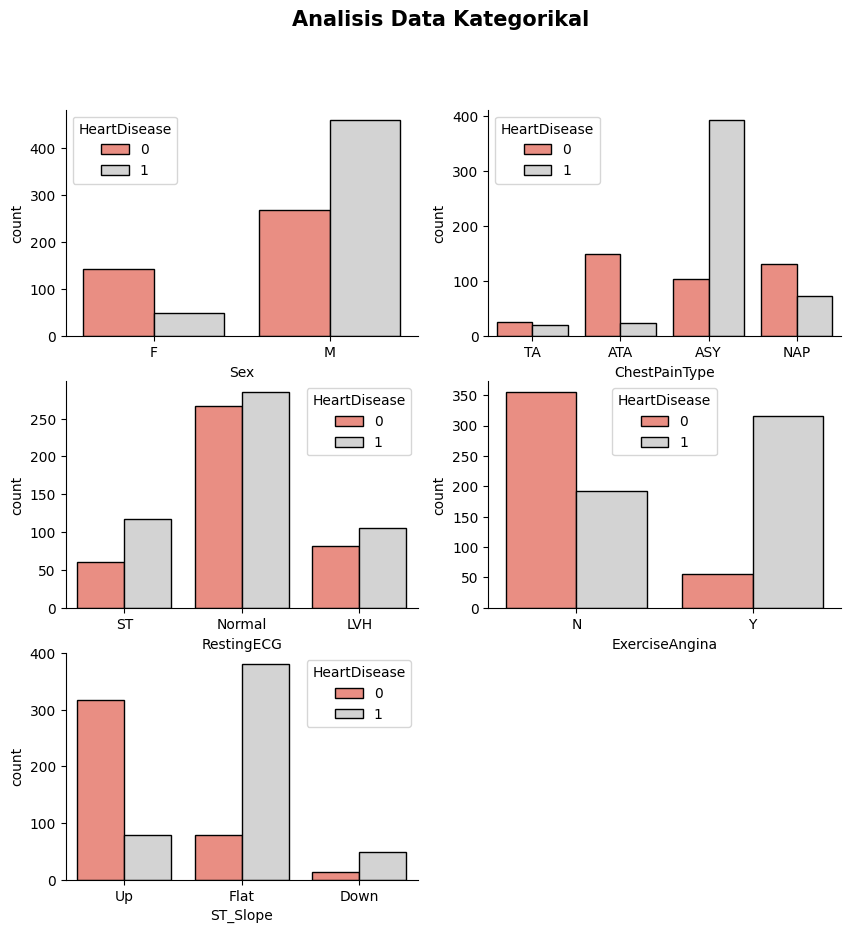

In [36]:
# -- Konfigurasi Warna --
colors = ['Salmon', 'Lightgray']

# -- Figur --
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Kategorikal", fontweight='heavy', fontsize='15')

# -- Bar Chart --
ax_sex = fig.add_subplot(gs[0,0])
sns.countplot(x='Sex', hue='HeartDisease', data=df, ax=ax_sex, palette=colors, edgecolor='#000000')
sns.despine()

ax_chestpaintype = fig.add_subplot(gs[0,1])
sns.countplot(x='ChestPainType', hue='HeartDisease', data=df, ax=ax_chestpaintype, palette=colors, edgecolor='#000000')
sns.despine()

ax_restingecg = fig.add_subplot(gs[1,0])
sns.countplot(x='RestingECG', hue='HeartDisease', data=df, ax=ax_restingecg, palette=colors, edgecolor='#000000')
sns.despine()

ax_exerciseangina = fig.add_subplot(gs[1,1])
sns.countplot(x='ExerciseAngina', hue='HeartDisease', data=df, ax=ax_exerciseangina, palette=colors, edgecolor='#000000')
sns.despine()

ax_stslope = fig.add_subplot(gs[2,0])
sns.countplot(x='ST_Slope', hue='HeartDisease', data=df, ax=ax_stslope, palette=colors, edgecolor='#000000')
sns.despine()

plt.show()

Kesimpulan:

1. Pada grafik pertama, dapat dilihat bahwa sebagian besar penderita penyakit jantung adalah laki-laki.
2. Pada grafik kedua, dapat dilihat bahwa sebagian pasien tidak mengalami gejala nyeri apapun pada dadanya.
3. Pada grafik ketiga, dapat dilihat bahwa sebagian besar pasien memiliki hasil resting EKG normal.
4. Pada grafik keempat, dapat dilihat bahwa sebagian besar pasien melakukan terapi angina.
5. Pada grafik kelima, dapat dilihat bahwa pasien dengan melakukan sesi terapi depresi dengan frekuensi yang konstan cenderung menderita penyakit jantung.

Data Numerikal

Kolom data yang termasuk ke dalam data numerikal antara lain:

1. Age
2. RestingBP
3. Cholesterol
4. FastingBS
5. MaxHR
6. Oldpeak
7. Heart Disease

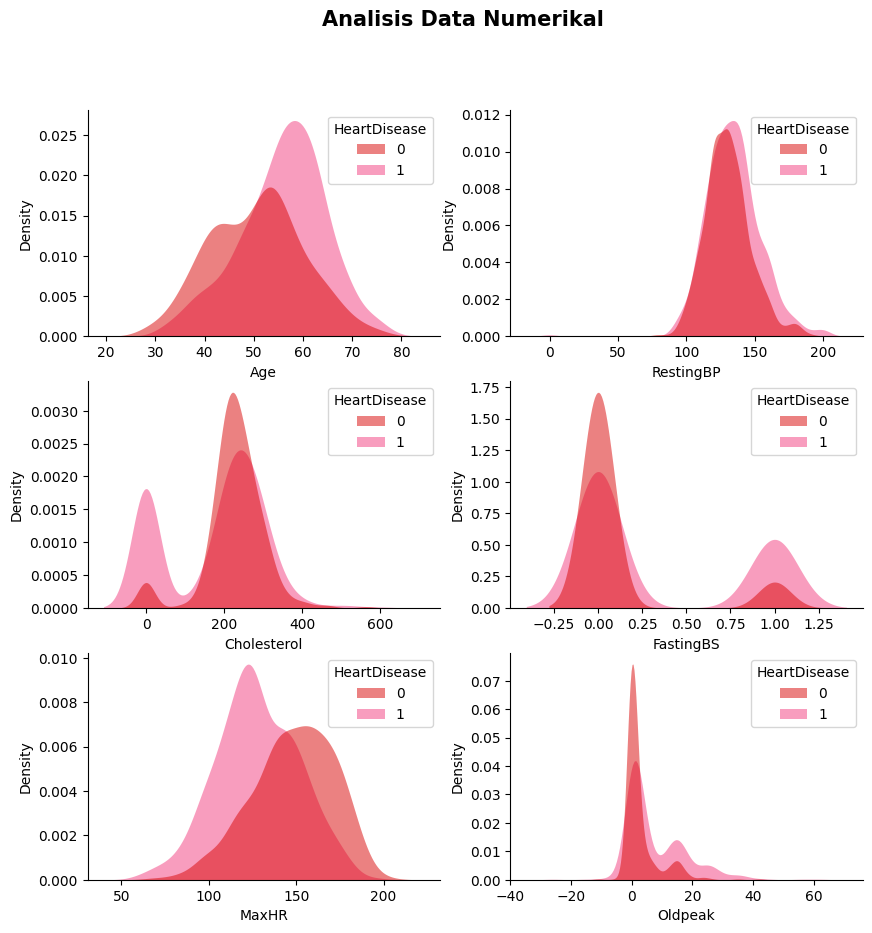

In [37]:
# -- Konfigurasi Warna --
colors = ['#D90404', '#F23D7F']

# -- Figur --
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(3,2)
plt.suptitle("Analisis Data Numerikal", fontweight='heavy', fontsize='15')

# -- KDE Plot --
ax_age = fig.add_subplot(gs[0,0])
sns.kdeplot(x='Age', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_age, palette=colors, shade=True)
sns.despine()

ax_restingbp = fig.add_subplot(gs[0,1])
sns.kdeplot(x='RestingBP', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_restingbp, palette=colors, shade=True)
sns.despine()

ax_cholesterol = fig.add_subplot(gs[1,0])
sns.kdeplot(x='Cholesterol', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_cholesterol, palette=colors, shade=True)
sns.despine()

ax_fastingBS = fig.add_subplot(gs[1,1])
sns.kdeplot(x='FastingBS', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_fastingBS, palette=colors, shade=True)
sns.despine()

ax_maxhr = fig.add_subplot(gs[2,0])
sns.kdeplot(x='MaxHR', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_maxhr, palette=colors, shade=True)
sns.despine()

ax_oldpeak = fig.add_subplot(gs[2,1])
sns.kdeplot(x='Oldpeak', hue='HeartDisease', data=df, fill=True, alpha=0.5, linewidth=0, ax=ax_oldpeak, palette=colors, shade=True)
sns.despine()

plt.show()

Kesimpulan:

1. Sebagian besar pasien yang menderita penyakit jantung berkisar sekitar 50-65 tahun.
2. Sebagian besar penderita penyakit jantung dan bukan penderita penyakit jantung memiliki tekanan darah di atas normal (120 mmHg).
3. Sebagian besar penderita penyakit jantung dan bukan penderita penyakit janrung memiliki kadar kolesterol yang tinggi dan di atas normal (200 mm/dL).
4. Dapat dilihat bahwa sebagian besar pasien yang menderita penyakit jantung memiliki gula darah puasa yang normal.
5. Orang yang tidak menderita penyakit jantung cenderung memiliki detak jantung maksimal lebih tinggi dibanding orang dengan penyakit jantung.
6. Orang yang tidak menderita penyakit jantung cenderung memiliki nilai oldpeak 0 dibanding orang yang menderita penyakit jantung yang memiliki persebaran yang lebih merata.

In [38]:
#df.hist(bins=10,figsize=(10,10), color='Salmon')
#plt.show()

In [39]:
#Mengubah nilai dari fitur kategorikal menjadi nilai numerik.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.copy(deep = True)

df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

In [40]:
#Menormalkan atau menstandardisasi nilai-nilai fitur numerik.
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesterol'] = ss.fit_transform(df[['Cholesterol']])
df['FastingBS'] = ss.fit_transform(df[['FastingBS']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])
df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-2.493869,0,3,2.032174,0.349422,-0.551341,2,1.304332,0,0.295455,2,0
1,-2.387796,0,1,-1.750778,0.184775,-0.551341,2,0.518368,0,0.295455,2,0
2,-2.281723,0,1,-1.480567,-0.007314,-0.551341,1,1.107841,0,0.295455,2,0
3,-2.175650,0,0,-1.750778,0.431746,-0.551341,1,0.518368,1,0.306818,1,1
4,-2.069577,0,1,-0.129513,-0.345755,-0.551341,1,2.090296,0,0.295455,2,0


Analisis Korelasi

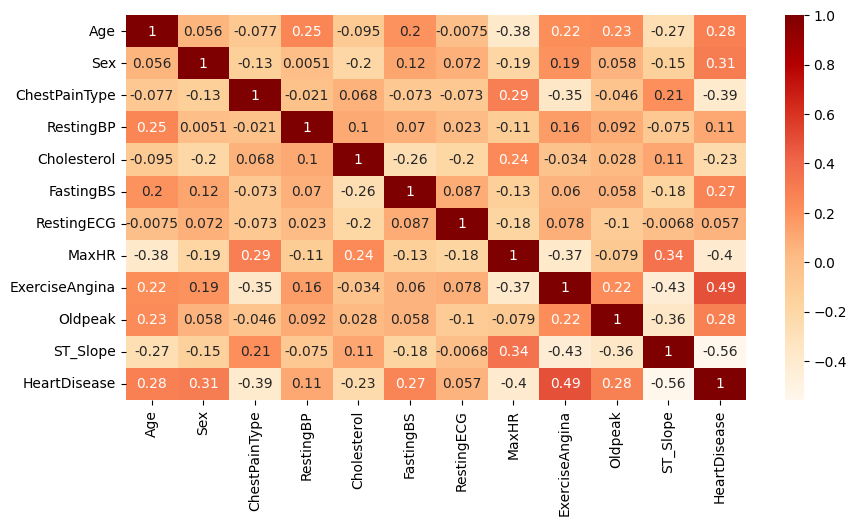

In [41]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='OrRd')
plt.show()

In [42]:
#y = df["HeartDisease"]
#X = df.drop(['ChestPainType', 'Cholesterol', 'MaxHR', 'ST_Slope', 'HeartDisease'],axis='columns')

# Split & Test Data

In [43]:
y = df["HeartDisease"]
X = df.drop(['HeartDisease'],axis=1)

In [44]:
scaler = StandardScaler()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

2. Random Forest

Best hyperparameters: {'max_depth': 5, 'n_estimators': 500}
Accuracy of Random Forest: 90.21739130434783 

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        72
           1       0.94      0.90      0.92       112

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

Confusion Matrix:


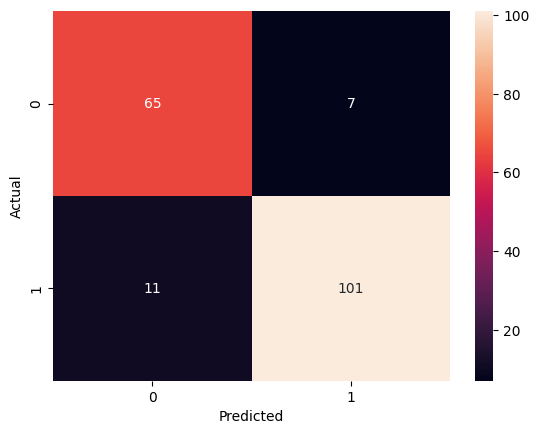

In [23]:
# Definisikan model Random Forest Classifier
m2 = 'Random Forest'
rf = RandomForestClassifier(random_state=42)

# Set hyperparameter yang akan diuji
params = {
    'n_estimators': [100, 500, 1000],  # Jumlah pohon dalam ensemble
    'max_depth': [5, 10, 15]  # Kedalaman maksimum setiap pohon
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

# Lakukan penyetelan hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Dapatkan hyperparameter terbaik
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Dapatkan model terbaik
best_rf = grid_search.best_estimator_

# Prediksi menggunakan model terbaik
rf_predicted = best_rf.predict(X_test)
rf_acc_score = accuracy_score(y_test, rf_predicted)

# Tampilkan hasil evaluasi
print("Accuracy of Random Forest:", rf_acc_score*100, '\n')
print(classification_report(y_test, rf_predicted))

# Buat confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, rf_predicted)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Tampilkan plot
plt.show()

In [46]:
import pickle

In [50]:
filename = 'jantung_model.sav'
pickle.dump(RandomForestClassifier, open(filename, 'wb'))